Import

In [4]:
import zipfile
from pathlib import Path
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup

In [5]:
url1 = 'https://divvy-tripdata.s3.amazonaws.com/index.html'

Criar lista de arquivos

In [7]:
lista = []
for x in range(202301,202311):
    #print ('https://divvy-tripdata.s3.amazonaws.com/' + str(x) + '-divvy-tripdata.zip')
    lista.append('https://divvy-tripdata.s3.amazonaws.com/' + str(x) + '-divvy-tripdata.zip')

Baixar arquivos da lista

In [9]:
for arquivo in lista:
    try:
        filename = arquivo.split('/', 3)[3] #divide pelas '/' e pega a última parte
        urllib.request.urlretrieve(arquivo, filename)
        print(f'Successfully downloaded {filename}')
    except Exception as e:
        print(f'Error downloading {filename}: {e}')

Successfully downloaded 202301-divvy-tripdata.zip
Successfully downloaded 202302-divvy-tripdata.zip
Successfully downloaded 202303-divvy-tripdata.zip
Successfully downloaded 202304-divvy-tripdata.zip
Successfully downloaded 202305-divvy-tripdata.zip
Successfully downloaded 202306-divvy-tripdata.zip
Successfully downloaded 202307-divvy-tripdata.zip
Successfully downloaded 202308-divvy-tripdata.zip
Successfully downloaded 202309-divvy-tripdata.zip
Successfully downloaded 202310-divvy-tripdata.zip


In [10]:
path = Path()

In [11]:
full_path = path.cwd()

In [12]:
full_path

PosixPath('/home/0c365608-8b36-45f6-afa4-1baa512bbf57/personal')

In [13]:
lista2 = list(full_path.glob('*.zip'))

In [14]:
# Initialize an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

In [15]:
# Iterate through the list of zip files
for zip_file_path in lista2:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_file:
        # List all files in the zip archive
        zip_file_contents = zip_file.namelist()

        # Assume you want to read a CSV file, modify as needed
        csv_files = [file for file in zip_file_contents if file.endswith('.csv')]

        # Check if there's at least one CSV file in the zip archive
        if csv_files:
            # Assuming you want to read the first CSV file, modify as needed
            csv_file_name = csv_files[0]
            print(f"processando arquivo {csv_file_name}")

            # Read the CSV file from the zip file into a DataFrame
            df = pd.read_csv(zip_file.open(csv_file_name), parse_dates=['started_at', 'ended_at'])

            # Concatenate the DataFrame to the combined DataFrame
            combined_df = pd.concat([combined_df, df], ignore_index=True)

processando arquivo 202303-divvy-tripdata.csv
processando arquivo 202304-divvy-tripdata.csv
processando arquivo 202307-divvy-tripdata.csv
processando arquivo 202301-divvy-tripdata.csv
processando arquivo 202309-divvy-tripdata.csv
processando arquivo 202302-divvy-tripdata.csv
processando arquivo 202310-divvy-tripdata.csv
processando arquivo 202308-divvy-tripdata.csv
processando arquivo 202306-divvy-tripdata.csv
processando arquivo 202305-divvy-tripdata.csv


In [16]:
combined_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6842AA605EE9FBB3,electric_bike,2023-03-16 08:20:34,2023-03-16 08:22:52,Clark St & Armitage Ave,13146,Larrabee St & Webster Ave,13193,41.918413,-87.636451,41.921822,-87.644140,member
1,F984267A75B99A8C,electric_bike,2023-03-04 14:07:06,2023-03-04 14:15:31,Public Rack - Kedzie Ave & Argyle St,491,NaN,NaN,41.970000,-87.710000,41.950000,-87.710000,member
2,FF7CF57CFE026D02,classic_bike,2023-03-31 12:28:09,2023-03-31 12:38:47,Orleans St & Chestnut St (NEXT Apts),620,Clark St & Randolph St,TA1305000030,41.898203,-87.637536,41.884576,-87.631890,member
3,6B61B916032CB6D6,classic_bike,2023-03-22 14:09:08,2023-03-22 14:24:51,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Kingsbury St,13154,41.888716,-87.644448,41.910522,-87.653106,member
4,E55E61A5F1260040,electric_bike,2023-03-09 07:15:00,2023-03-09 07:26:00,Walsh Park,18067,Sangamon St & Lake St,TA1306000015,41.914480,-87.668013,41.885779,-87.651025,member


In [17]:
#Calcular a duração da viagem
combined_df["travel_duration"] = (combined_df["ended_at"] - combined_df["started_at"]).dt.total_seconds()

In [18]:
#tradução dos nomes dos dias da semana
day_name_translation = {
    'Monday': 'Segunda-feira',
    'Tuesday': 'Terça-feira',
    'Wednesday': 'Quarta-feira',
    'Thursday': 'Quinta-feira',
    'Friday': 'Sexta-feira',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}
#aplicar a tradução
combined_df["dia_semana"] = combined_df["started_at"].dt.day_name().map(day_name_translation)

Limpeza dos dados

In [20]:
# combined_df.describe() #medidas de estatística descritiva
# combined_df.info() #descreve o tipo de dados em cada coluna
# combined_df.isnull().sum()
# combined_df.count() #conta os valores não vazios, assim dá pra ver onde tá faltando dado

In [21]:
#Para viagens sem o nome da estação de inicio:
null_df = combined_df[combined_df['start_station_name'].isna()]
null_df = null_df.sort_values(by='start_station_name')
short_null_df = null_df.head(5)
#CONCLUSÃO: não tem o id nem o nome da estação de inicio, mas tem as coordenadas de inicio

In [22]:
#Para viagens sem o id da estação de inicio:
null_df = combined_df[combined_df['start_station_id'].isna()]
null_df = null_df.sort_values(by='start_station_id')
short_null_df = null_df.head(5)
#CONCLUSÃO: não tem o id nem o nome da estação de inicio, mas tem as coordenadas de inicio

In [23]:
#Para viagens sem o nome da estação de fim:
null_df = combined_df[combined_df['end_station_name'].isna()]
null_df = null_df.sort_values(by='end_station_name')
short_null_df = null_df.head(5)
#CONCLUSÃO: não tem o id nem o nome da estação de fim, mas tem as coordenadas de fim

In [24]:
#Para viagens sem o id da estação de fim:
null_df = combined_df[combined_df['end_station_id'].isna()]
null_df = null_df.sort_values(by='end_station_id')
short_null_df = null_df.head(5)
#CONCLUSÃO: não tem o id nem o nome da estação de fim, mas tem as coordenadas de fim

In [25]:
#Para viagens sem as coordenadas da estação de fim:
null_df = combined_df[combined_df['end_lat'].isna()]
null_df = null_df.sort_values(by='end_lat')
short_null_df = null_df.head(5)
#CONCLUSÃO: essas ferrou, porque não tem mesmo nem o id nem o nome nem as coordenadas de fim.
#Uai, mas elas tem 'ended_at'. Como que terminou e não salvou os dados da estação que foi entregue?

Análise descritiva

Sem separar por grupo

In [28]:
#Qual o dia que tem mais viagens?
combined_df.groupby(by='dia_semana')['dia_semana'].count().sort_values()

dia_semana
Segunda-feira    654736
Domingo          679509
Quarta-feira     739191
Terça-feira      744853
Quinta-feira     755020
Sexta-feira      758152
Sábado           801825
Name: dia_semana, dtype: int64

In [29]:
#Checando a coluna de duração da viagem. Não pode ter duração negativa, né
null_df = combined_df.sort_values(by='travel_duration', ascending=True).head(10)
null_df = combined_df[combined_df['travel_duration'] < 0]

In [30]:
null_df = combined_df.describe() #salvar em um df pra ver todas as colunas
#olhando o resultado, deu pra ver que tem linhas com lat ou long = 0.

In [31]:
#Fazendo uma lista de estações, não tem estação com lat long = 0
df_stations = combined_df[['start_station_id', 'start_station_name', 'start_lat', \
  'start_lng']].drop_duplicates(subset=['start_station_id'])
#Confirmando filtrando as linhas    
null_df = combined_df[combined_df['end_lat'] == 0]

Mas precisa limpar os dados primeiro

In [33]:
#LIMPEZA DOS DADOS:
#Excluída qualquer linha com algum valor vazio
rows_with_null = combined_df[combined_df.isnull().any(axis=1)] #busca por null ou NaN
rows_with_nan = combined_df[combined_df.isna().any(axis=1)]  #busca por null ou NaN

#mantém o oposto; linhas sem null ou NaN
valid_rows = combined_df[~combined_df.isna().any(axis=1)]

In [34]:
#Excluída linha com duração de viagem negativa ou nula (com zero)
valid_rows.shape[0] #3.889.766 linhas
valid_rows[valid_rows['travel_duration'] == 0].shape[0] #438 linhas
valid_rows[valid_rows['travel_duration'] < 0].shape[0] #30 linhas
valid_rows[valid_rows['travel_duration'] > 0].shape[0] #3.889.766 - 438 - 30 = 3.889.298 linhas

valid_rows2 = valid_rows[valid_rows['travel_duration'] > 0]

#Excluída linha com lat long igual a zero
valid_rows2.shape[0]
valid_rows2[valid_rows2['end_lat'] == 0]
valid_rows2[valid_rows2['end_lng'] == 0]
valid_rows2[valid_rows2['end_lat'] != 0].shape[0]

valid_rows3 = valid_rows2[valid_rows2['end_lat'] != 0]

In [35]:
#checar os valores da coluna member_casual
valid_rows3.groupby(by='member_casual')['member_casual'].count() #ufa, tá certo

member_casual
casual    1422785
member    2466510
Name: member_casual, dtype: int64

Agora sim Análise Descritiva dos dados válidos

In [37]:
df_descritive = valid_rows3.describe()

In [38]:
#contagem do numero de viagens por dia da semana
valid_rows3.groupby(by='dia_semana')['dia_semana'].count().sort_values()

dia_semana
Segunda-feira    504773
Domingo          513842
Quarta-feira     562342
Sexta-feira      564618
Terça-feira      571019
Quinta-feira     572462
Sábado           600239
Name: dia_semana, dtype: int64

In [39]:
#mês que teve mais viagem
# Now, group by month and count the occurrences
monthly_counts = valid_rows3.groupby(pd.Grouper(key='started_at', freq='M')).size().reset_index(name='counts')
#OR
valid_rows3['month'] = valid_rows3['started_at'].dt.month
monthly_counts = valid_rows3.groupby('month').size().reset_index(name='counts')

/tmp/ipykernel_104/3148194931.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_rows3['month'] = valid_rows3['started_at'].dt.month


<Axes: xlabel='month'>

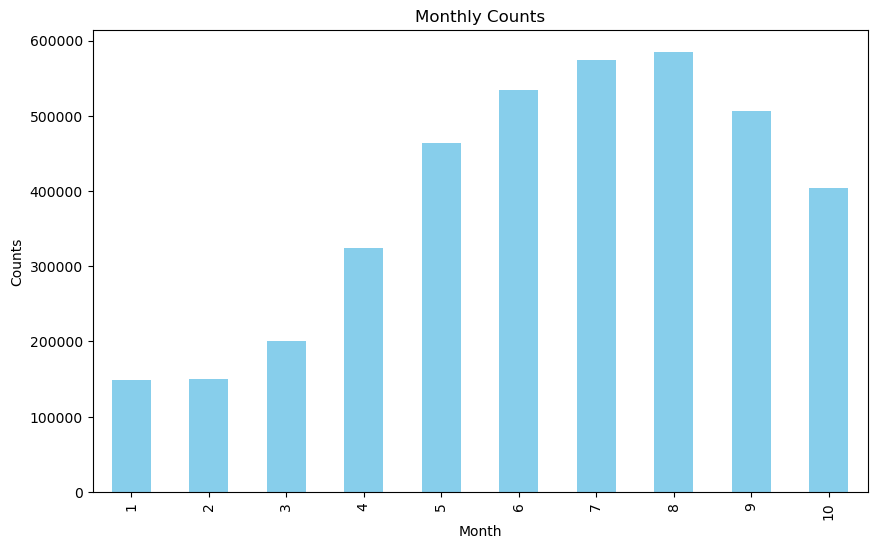

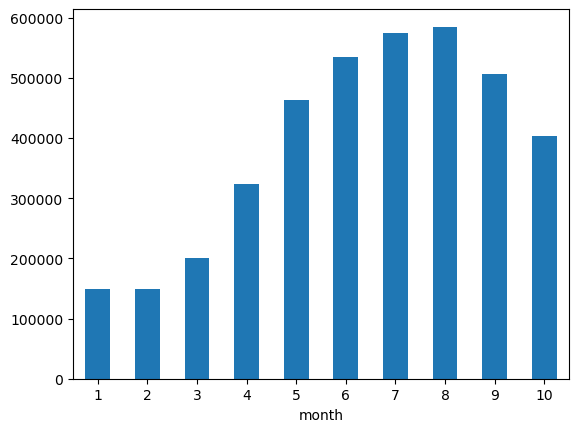

In [40]:
##plotando esse gráfico
monthly_counts.plot(kind='bar', x='month', y='counts', figsize=(10, 6), legend=False, color='skyblue',
                    title='Monthly Counts', xlabel='Month', ylabel='Counts')
monthly_counts.plot(kind='bar', x='month', y='counts', legend=False, rot=0)

O problema da quantidade de estações

In [42]:
#quantidade de estações
num_stations = combined_df[['start_station_id', 'start_station_name', 'start_lat', \
  'start_lng']].drop_duplicates(subset=['start_station_id']).reset_index(drop=True)

In [43]:
num_stations = combined_df[['start_station_name']].drop_duplicates(subset=['start_station_name']).reset_index(drop=True)

In [44]:
num_stations = combined_df[['start_lng']].drop_duplicates(subset=['start_lng']).reset_index(drop=True)

In [45]:
unique_names = valid_rows3.groupby('start_station_id')['start_station_name'].unique()

In [46]:
# Iterate over the Series
total_stations = 0
for station_id, names in unique_names.items():
    if len(names) > 1:
        print(f"Station ID {station_id} has multiple names: {names}")
        total_stations = total_stations  + 1
print(f" total de {total_stations} estações com mais de um nome")

Station ID 13259 has multiple names: ['California Ave & Francis Pl (Temp)' 'California Ave & Francis Pl']
Station ID 13290 has multiple names: ['Noble St & Milwaukee Ave' 'Noble St & Milwaukee Ave (Temp)']
Station ID 15541 has multiple names: ['Buckingham Fountain' 'Buckingham Fountain (Temp)'
 'Buckingham Fountain (Columbus/Balbo)']
Station ID 15541.1.1 has multiple names: ['Buckingham - Fountain' 'Buckingham Fountain']
Station ID 15623 has multiple names: ['Campbell Ave & Montrose Ave' 'Campbell Ave & Montrose Ave (Temp)']
Station ID 20133 has multiple names: ['Woodlawn & 103rd - Olive Harvey Vaccination Site' 'Woodlawn & 103rd']
Station ID 303 has multiple names: ['Kildare Ave & Division St' 'Public Rack - Kildare Ave & Division St']
Station ID 335.0 has multiple names: ['Public Rack - Komensky Ave & 31st St' 'Komensky Ave & 31st St']
Station ID 390 has multiple names: ['Public Rack - California Ave & Marquette Rd'
 'California Ave & Marquette Rd']
Station ID 410 has multiple names:

In [47]:
##pivot table, mostrando as viagens por origem-destino
pivot_table = valid_rows3.pivot_table(index='start_station_name', columns='end_station_name', aggfunc='size', fill_value=0)

In [48]:
#para ver o numero maximo do dataframe
pivot_table.to_numpy().max()

9624

In [49]:
#se fosse um df com colunas que não sejam numéricas, teria que filtrar:
valid_rows3.max(numeric_only=True).max()

728178.0

In [50]:
#Mas preciso saber a linha e a coluna desse máximo:
max_value_index = pivot_table.stack().idxmax()
# max_value_index is a tuple (row_name, column_name)
print(f"The maximum value is in the row: {max_value_index[0]} and column: {max_value_index[1]}")

The maximum value is in the row: Streeter Dr & Grand Ave and column: Streeter Dr & Grand Ave


In [51]:
#Conferindo o resultado, pegando a linha e coluna obtidos
pivot_table.loc[max_value_index[0], max_value_index[1]]

9624

Quais as rotas mais solicitadas?

In [53]:
# Assuming 'pivot_table' is your DataFrame created from the pivot operation
# Stack the pivot table to get a MultiIndex Series
stacked_pivot = pivot_table.stack()

In [54]:
# Reset the index to turn it into a DataFrame
routes_df = stacked_pivot.reset_index(name='quantity')

In [55]:
# Create a 'route' column by concatenating 'start_station' and 'end_station' with a separator
routes_df['route'] = routes_df['start_station_name'] + ' to ' + routes_df['end_station_name']

In [56]:
most_used_routes_df = routes_df.sort_values(by='quantity', ascending=False).reset_index()
sdf = most_used_routes_df[['quantity', 'route']].head() #só pra ler uma parte dos resultados

In [57]:
#Qual a duração média das viagens?
valid_rows3['travel_duration'].mean()

980.4489494882748

In [58]:
#Qual a média de viagens por dia da semana?
valid_rows3.groupby('dia_semana')['travel_duration'].mean()

dia_semana
Domingo          1195.477254
Quarta-feira      851.940413
Quinta-feira      866.699849
Segunda-feira     920.413200
Sexta-feira       969.614226
Sábado           1189.376930
Terça-feira       871.708950
Name: travel_duration, dtype: float64

Agrupamento por estações do ano

In [60]:
# Function to map quarter start dates to season names
def get_season_name(start_date):
    month = start_date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

In [61]:
# Apply the function to create a new column 'season'
valid_rows3['season'] = valid_rows3['started_at'].apply(get_season_name)

/tmp/ipykernel_104/1997524813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_rows3['season'] = valid_rows3['started_at'].apply(get_season_name)


<Axes: xlabel='season'>

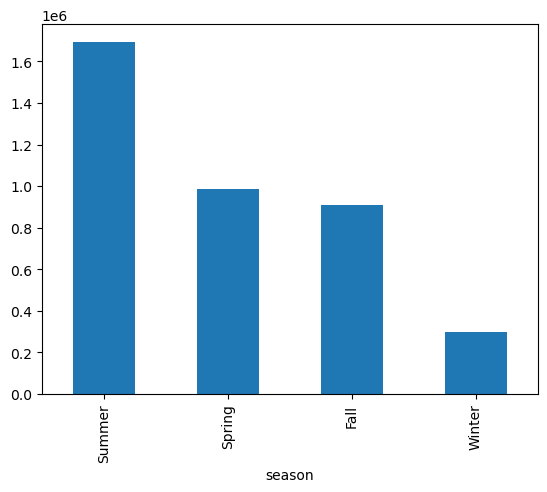

In [62]:
# Group by the 'season' column and count the occurrences
seasonly_counts = valid_rows3.groupby('season').size().reset_index(name='counts').sort_values(by='counts', ascending=False).reset_index()
seasonly_counts.plot(kind='bar', x='season', y='counts', legend=False)
#RESPOSTA: No verão tem mais procura, seguido de primavera, outono, e inverno por último

In [63]:
#Quais as estações com mais partidas ou chegadas?
most_started_stations = valid_rows3.groupby('start_station_id')['start_station_id'].count().sort_values(ascending=False).head(10)
most_started_destination = valid_rows3.groupby('end_station_id')['end_station_id'].count().sort_values(ascending=False).head(10)

In [64]:
####criação do db com várias tabelas
from create_database import create_database


In [65]:
# Call the create_database function
#create_database(valid_rows3, 'newdb9.db')

ANÁLISE POR GRUPO

In [67]:

#contagem de viagens por grupo
valid_rows3.groupby('member_casual')['ride_id'].count()

member_casual
casual    1422785
member    2466510
Name: ride_id, dtype: int64

In [68]:
#criar subsets pelos membros
df_membros =  valid_rows3[valid_rows3['member_casual'] == 'member']
df_casual = valid_rows3[valid_rows3['member_casual'] == 'casual']

In [69]:
# só checando o total
# valid_rows3.shape[0]
# df_membros.shape[0] + df_casual.shape[0] 

In [70]:
# valid_rows3.columns
df_membros.describe()
df_casual.describe()
df_membros.info()
df_casual.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2466510 entries, 0 to 5133259
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  travel_duration     float64       
 14  dia_semana          object        
 15  month               int32         
 16  season              object        
dtypes: datetime64[ns](2), float64(5), int32(1), object(9)
memory usage: 329.3+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 1422

In [71]:
# Calculate the percentage of rides per member type
percentage_rides_per_member = valid_rows3['member_casual'].value_counts(normalize=True) * 100
percentage_rides_per_member.apply(lambda x: f'{x:.2f}%')

member_casual
member    63.42%
casual    36.58%
Name: proportion, dtype: object

Média de viagens, por grupo, por dia da semana

In [73]:
##### média de viagens por dia da semana
#por agrupar em 2 itens, fica um Series multiIndex
mean_travel_duration = valid_rows3.groupby(['member_casual', 'dia_semana'])['travel_duration'].mean()

<Axes: title={'center': 'Mean Travel Duration by Member Type and Day of the Week'}, xlabel='Member Type', ylabel='Mean Travel Duration'>

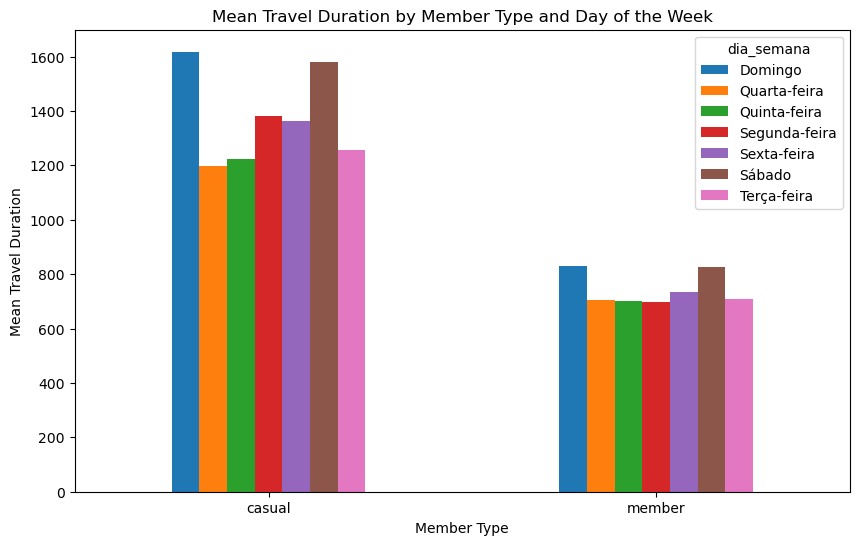

In [74]:
# Pivot the table for better visualization
mean_travel_duration2 = mean_travel_duration.unstack(level='dia_semana')

# Plot the data
mean_travel_duration2.plot(kind='bar', rot=0, title='Mean Travel Duration by Member Type and Day of the Week',
                          xlabel='Member Type', ylabel='Mean Travel Duration', figsize=(10, 6))

In [75]:
#CONCLUSÃO: As viagens dos casuais são mais longas do que as dos membros

Média de viagens, por mês, por grupo

In [77]:
#inserir a coluna de mes
valid_rows3['month'] = valid_rows3['started_at'].dt.month

/tmp/ipykernel_104/3789841410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_rows3['month'] = valid_rows3['started_at'].dt.month


In [78]:
#agrupar por tipo de membro e mes
# monthly_counts = valid_rows3.groupby(['member_casual', 'month']).mean()
monthly_counts = valid_rows3.groupby(['member_casual', 'month'])['travel_duration'].mean()

In [79]:
# Pivot the table for better visualization
monthly_counts2 = monthly_counts.unstack(level='month')

<Axes: title={'center': 'Total de viagens por mês, por grupo'}, xlabel='Member Type', ylabel='média'>

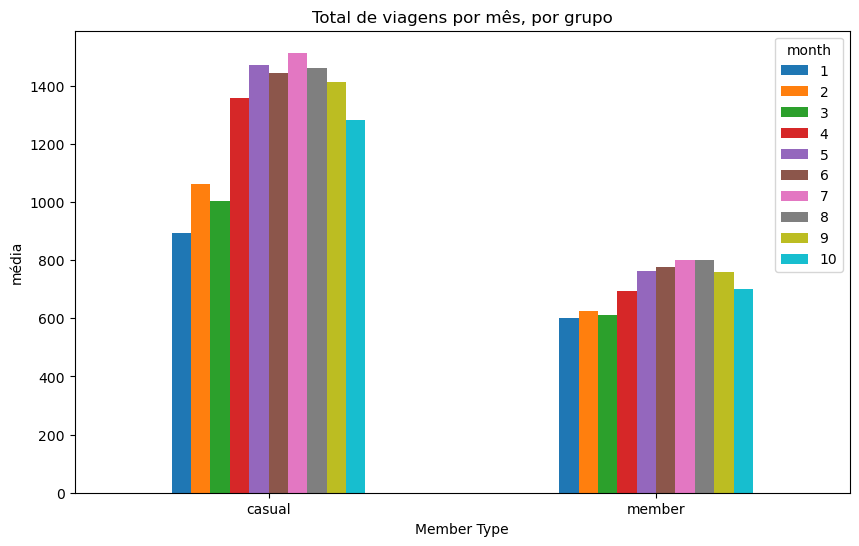

In [80]:
##plotando esse gráfico
monthly_counts2.plot(kind='bar', figsize=(10,6), rot=0, title='Total de viagens por mês, por grupo', xlabel='Member Type', ylabel='média')

In [81]:
###### Qual a duração média das viagens?
mean_travel_duration3 = valid_rows3.groupby('member_casual')['travel_duration'].mean()

Quais as estações mais usadas, por grupo?

In [83]:
#Quais as estações com mais partidas ou chegadas?
#Achei mais facil usar os dfs separados, porque senão fica agrupado por estação, e pode ser que
#um grupo tenha dados em uma estação mas o outro grupo não tenha

In [84]:
most_started_stations_membros = df_membros.groupby('start_station_id')['start_station_id'].count().sort_values(ascending=False).head(10)
most_started_stations_casual = df_casual.groupby('start_station_id')['start_station_id'].count().sort_values(ascending=False).head(10)

In [85]:
most_started_destinations_membros = df_membros.groupby('end_station_id')['end_station_id'].count().sort_values(ascending=False).head(10)
most_started_destinations_casual = df_casual.groupby('end_station_id')['end_station_id'].count().sort_values(ascending=False).head(10)

In [86]:
#qual a rota mais usada, por grupo?
# Quais as estações com mais partidas ou chegadas?

In [87]:
#Fazer as mesmas análises mas agora no SQL
#	Dá pra ver se teve alguma época específica em que o nome dos id's mudou?	
#	** Por último, rodar tudo de novo mas agora incluindo as linhas corrigidas

In [88]:
#Como plotar as viagens em um mapa?
#(ver https://coderzcolumn.com/tutorials/data-science/how-to-create-connection-map-chart-in-python-jupyter-notebook-plotly-and-geopandas#google_vignette)